In [15]:
import joblib
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

In [16]:
def removeOutliers(a):
    df = a
    # Drop the column which is out of model scope
    d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
             'Payment_of_Min_Amount', 'Payment_Behaviour',
             'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
             'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
             'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
    drop_df = df.drop(d_col, axis=1).copy()
    drop_df.isnull().sum()
    drop_na = drop_df.dropna().copy()
    # Revise the incorrect data whole table
    sym = "\\`*_{}[]()>#@+!$:;"
    col_int = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt']
    col_str = ['Credit_Score', 'Credit_History_Age']
    for i in col_int:
        for c in sym:
            drop_na[i] = drop_na[i].astype(str).str.replace(c, '')
    for i in col_str:
        for c in sym:
            drop_na[i] = drop_na[i].replace(c, '')

    # Transform the information to the value
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ', '.')
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months', '')

    # Transform the object data the be float data type
    col_int2 = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age']
    for i in col_int2:
        drop_na[i] = drop_na[i].astype(float)

    df_cleaned = drop_na

    Q1 = df_cleaned.Credit_History_Age.quantile(0.25)
    Q3 = df_cleaned.Credit_History_Age.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_History_Age'] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_History_Age'] < (Q1 - 1.5 * IQR)].index)

    Q1 = df_cleaned.Credit_Utilization_Ratio.quantile(0.25)
    Q3 = df_cleaned.Credit_Utilization_Ratio.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_Utilization_Ratio'] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Credit_Utilization_Ratio'] < (Q1 - 1.5 * IQR)].index)

    Q1 = df_cleaned.Delay_from_due_date.quantile(0.25)
    Q3 = df_cleaned.Delay_from_due_date.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Delay_from_due_date'] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Delay_from_due_date'] < (Q1 - 1.5 * IQR)].index)

    Q1 = df_cleaned.Outstanding_Debt.quantile(0.25)
    Q3 = df_cleaned.Outstanding_Debt.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Outstanding_Debt'] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Outstanding_Debt'] < (Q1 - 1.5 * IQR)].index)

    Q1 = df_cleaned.Num_of_Delayed_Payment.quantile(0.25)
    Q3 = df_cleaned.Num_of_Delayed_Payment.quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Num_of_Delayed_Payment'] > (Q3 + 1.5 * IQR)].index)
    df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Num_of_Delayed_Payment'] < (Q1 - 1.5 * IQR)].index)

    return df_cleaned

In [17]:
def cleanData(a):
    df = a
    # Drop the column which is out of model scope
    d_col = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
             'Payment_of_Min_Amount', 'Payment_Behaviour',
             'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
             'Num_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
             'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
    drop_df = df.drop(d_col, axis=1).copy()
    drop_df.isnull().sum()
    drop_na = drop_df.dropna().copy()
    # Revise the incorrect data whole table
    sym = "\\`*_{}[]()>#@+!$:;"
    col_int = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt']
    col_str = ['Credit_Score', 'Credit_History_Age']
    for i in col_int:
        for c in sym:
            drop_na[i] = drop_na[i].astype(str).str.replace(c, '')
    for i in col_str:
        for c in sym:
            drop_na[i] = drop_na[i].replace(c, '')

    # Transform the information to the value
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ', '.')
    drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months', '')

    # Transform the object data the be float data type
    col_int2 = ['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age']
    for i in col_int2:
        drop_na[i] = drop_na[i].astype(float)

    return drop_na

In [18]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, epochs=10000, C=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.C = C
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        min = float('inf')
        max = float('inf')
        for epoch in range(self.epochs):
            # print(self.weights)
            for i in range(num_samples):
                pred = np.dot(X[i], self.weights) - self.bias
                condition = y[i] * pred > 0
                if not condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

In [19]:
df = pd.read_csv("../data-sets/train.csv")

              precision    recall  f1-score   support

        Good       0.50      0.14      0.22      2801
        Poor       0.58      0.39      0.47      4560
    Standard       0.57      0.81      0.67      8213

    accuracy                           0.57     15574
   macro avg       0.55      0.45      0.45     15574
weighted avg       0.56      0.57      0.53     15574



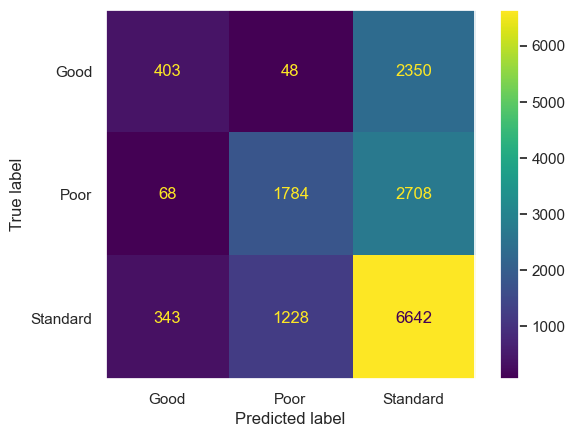

In [20]:
### Logistic ###
data = cleanData(df)
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)
joblib.dump(logreg, "logistic")
# Make predictions on the test data
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.52      0.28      0.37      2660
        Poor       0.62      0.40      0.49      3715
    Standard       0.61      0.81      0.69      7506

    accuracy                           0.60     13881
   macro avg       0.58      0.50      0.52     13881
weighted avg       0.59      0.60      0.58     13881



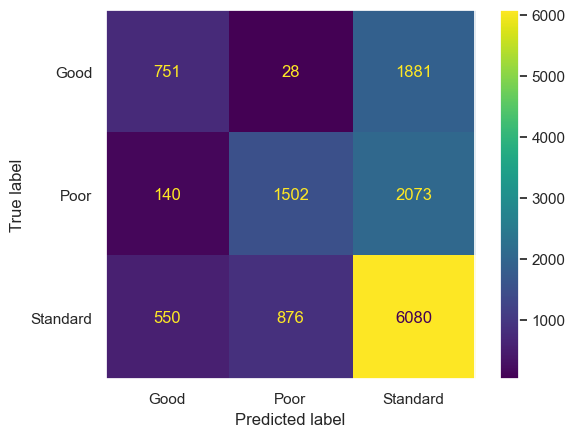

In [21]:
### Logistic No Outliers ###
data = removeOutliers(df)
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)
joblib.dump(logreg, "logistic_no_outliers")
# Make predictions on the test data
predictions = logreg.predict(X_test)


print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      2801
        Poor       0.59      0.44      0.50      4560
    Standard       0.56      0.84      0.68      8213

    accuracy                           0.57     15574
   macro avg       0.39      0.43      0.39     15574
weighted avg       0.47      0.57      0.50     15574



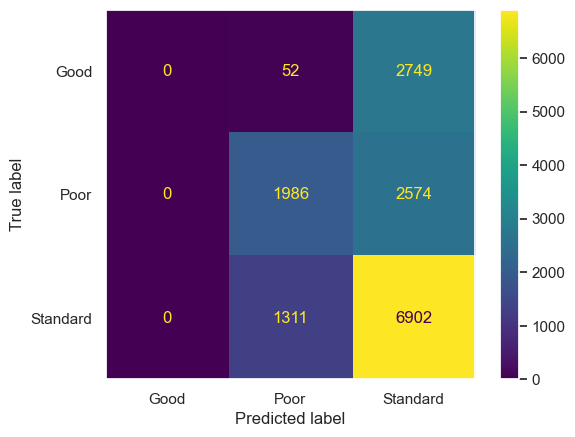

In [22]:
### Linear SVM ###
data = cleanData(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_li.fit(Z_svm_train, np.asarray(y_train))
joblib.dump(svc_li, "svc_linear")
predictions = svc_li.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_li.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_li.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      2660
        Poor       0.63      0.44      0.52      3715
    Standard       0.58      0.88      0.70      7506

    accuracy                           0.59     13881
   macro avg       0.41      0.44      0.41     13881
weighted avg       0.49      0.59      0.52     13881



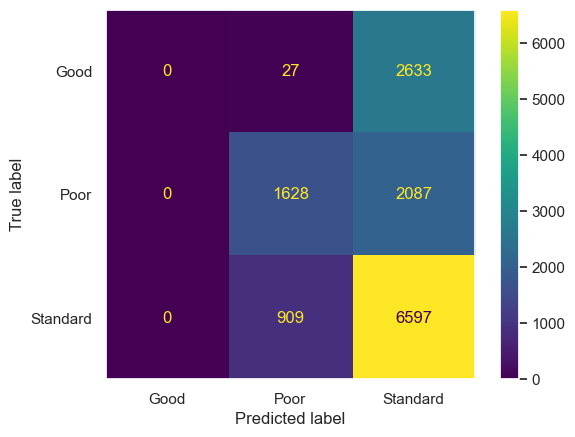

In [23]:
### Linear SVM No Outliers ###
data = removeOutliers(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_li.fit(Z_svm_train, np.asarray(y_train))
joblib.dump(svc_li, "svc_linear_no_outliers")
predictions = svc_li.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_li.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_li.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.59      0.06      0.10      2801
        Poor       0.66      0.57      0.61      4560
    Standard       0.60      0.83      0.70      8213

    accuracy                           0.62     15574
   macro avg       0.62      0.49      0.47     15574
weighted avg       0.62      0.62      0.57     15574



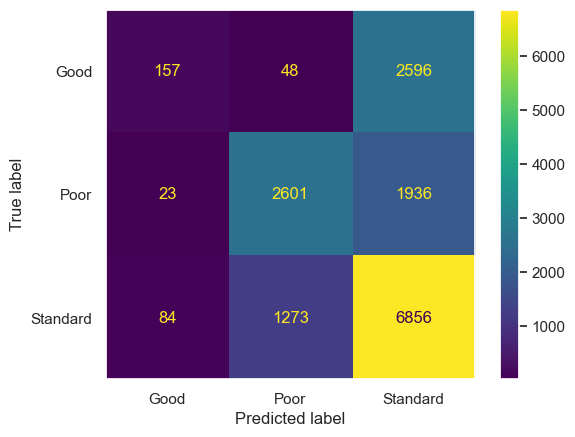

In [24]:
### RBF SVM ###
data = cleanData(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_rbf.fit(Z_svm_train, np.asarray(y_train))
joblib.dump(svc_rbf, "svc_rbf")
predictions = svc_rbf.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_rbf.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_rbf.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.51      0.32      0.40      2660
        Poor       0.69      0.58      0.63      3715
    Standard       0.65      0.79      0.71      7506

    accuracy                           0.64     13881
   macro avg       0.62      0.56      0.58     13881
weighted avg       0.64      0.64      0.63     13881



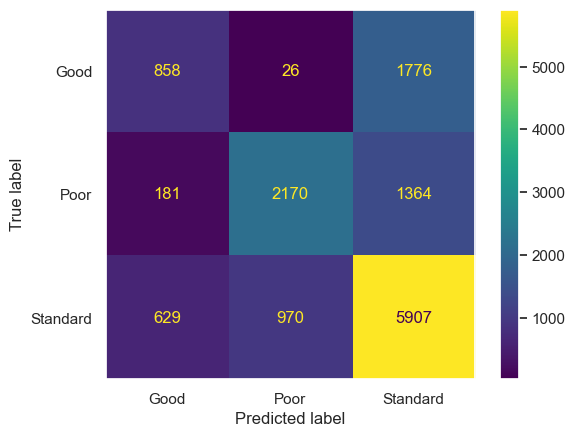

In [25]:
### RBF SVM No Outliers ###
data = removeOutliers(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_rbf.fit(Z_svm_train, np.asarray(y_train))
joblib.dump(svc_rbf, "svc_rbf_no_outliers")
predictions = svc_rbf.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_rbf.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_rbf.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.40      0.75      0.52      2660
        Poor       0.62      0.68      0.65      3715
    Standard       0.75      0.49      0.59      7506

    accuracy                           0.59     13881
   macro avg       0.59      0.64      0.59     13881
weighted avg       0.65      0.59      0.59     13881



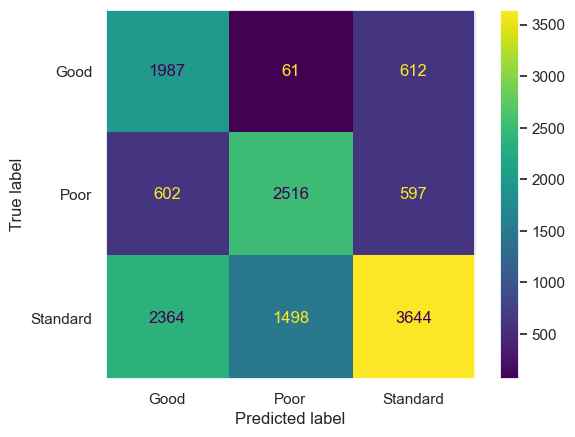

In [26]:
### Linear Oversampled No Outliers ###
data = removeOutliers(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X_train, y_train)

scaler = preprocessing.StandardScaler()
Z_trainos = scaler.fit_transform(X_os)
Z_svm_test = scaler.transform(X_test)

svc_li = SVC(kernel='linear')
svc_li.fit(Z_trainos, np.asarray(y_os))
joblib.dump(svc_li, "svc_li_no_outliers_oversampled")
predictions = svc_li.predict(Z_svm_test)
print(classification_report(y_test, predictions))
cm_svm_li = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm_svm_li,display_labels=svc_li.classes_).plot()
plt.grid(False)

              precision    recall  f1-score   support

        Good       0.40      0.75      0.52      2660
        Poor       0.62      0.68      0.65      3715
    Standard       0.75      0.48      0.59      7506

    accuracy                           0.59     13881
   macro avg       0.59      0.64      0.59     13881
weighted avg       0.65      0.59      0.59     13881



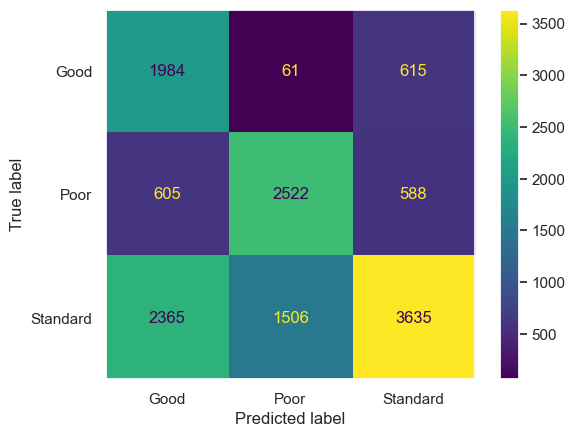

In [27]:
### RBF Oversampled No Outliers ###
data = removeOutliers(df)
X, y = data.drop(columns=['Credit_Score']), data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X_train, y_train)

scaler = preprocessing.StandardScaler()
Z_trainos = scaler.fit_transform(X_os)
Z_svm_test = scaler.transform(X_test)

svc_rbf = SVC(kernel='linear')
svc_rbf.fit(Z_trainos, np.asarray(y_os))
joblib.dump(svc_rbf, "svc_rbf_no_outliers_oversampled")
predictions = svc_rbf.predict(Z_svm_test)
print(classification_report(y_test, predictions))
cm_svm_rbf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm_svm_rbf,display_labels=svc_rbf.classes_).plot()
plt.grid(False)